<a href="https://colab.research.google.com/github/veronica1013/Test-for-Hypothyroidism/blob/main/Moringa_Data_Science_Core_Module2_W8_Independent_Project_2021_10_Veronica_Isiaho_Python_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test for Hypothyroidism

## 1. Defining the Question

### a) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. We will se the healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b) Defining the Metric for Success
A model that will accurately predict whether or not the patient's symptoms indicate that the patient has hypothyroid which are:
1.A boosted decision tree model with accuracy score of above 90 %
2.A support Vector Machine model with accuracy score of above 90 %


#### Hypothesis
Null Hypothesis: Patient's symptoms indicate that the patient has hypothyroid.

Alternate Hypothesis: Patient's symptoms doesn't indicate that the patient has hypothyroid.


#### Significance level
The significance level is set at alpha = 0.05

### c) Understanding the context 
Hypothyroidism: (Underactive Thyroid) idicates too Little Thyroid Hormone. Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. Since the main purpose of thyroid hormone is to "run the body's metabolism," it is understandable that people with this condition will have symptoms associated with a slow metabolism.

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. We will therefore use the healthcare datasets provided to accomplish the following objective:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Details of the columns in the dataset are as listed below:
1. Age
2. Sex
3. on_thyroxine
4. query_on_thyroxine
5. on_antithyroid_medicationthyroid_surgery
6. query_hypothyroid
7. query_hyperthyroid
8. pregnant
9. sick
10. tumor
11. lithium
12. goitre
13. TSH_measured
14. TSH
15. T3_measured
16. T3
17. TT4_measured
18. TT4

### d) Recording the Experimental Design
The experimental design will be as listed below:
1. Loading the data
2. Understanding the data
3. Decision Trees:
> Random Forest
> Ada Boosted Trees
> Gradient boosted Trees
4. Data Cleaning
4. Perform univariate, bivariate and multivariate analysis
5. Perform regression analysis (polynomial, rbf kernel function)
> Polynomial
> Multiple Linear Regression
> rbf kernel function
> Build SVM model
> Evaluate performance and pick the kernel that performs the best

*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression
6. Check for Multicollinearity
7. Provide a recommendation based on the analysis
8. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
9. Challenge the solution by providing insights on how to make improvements in model by:

**N/B:** After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version

### e) Data Relevance

The data that was provided is suitable for prediction as to whether patient symptoms indicates hypothyroidism or not.

### 1.1 Importing the libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2. Loading the Data

The dataset and glossary to use for this project can be found here [link](http://bit.ly/hypothyroid_data).

In [2]:
# Loading the data 
url = "http://bit.ly/hypothyroid_data"
data_df= pd.read_csv(url)


## 3. Checking the Data

In [3]:
# Preview first rows
data_df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?


In [4]:
# Preview last rows
data_df.tail(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
# Check the shape
data_df.shape

(3163, 26)

In [6]:
# Ckeck column names
data_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [7]:
# Check the data types
data_df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [8]:
# Check if there are any missing values
data_df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [9]:
# Check duplicates if any in the dataset
data_df.duplicated().sum()

77

In [10]:
# Confirm the 3 duplicates
duplicate = data_df[data_df.duplicated()]
duplicate

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


It is evident that the data is not similar. Thus decided to keep them.

In [11]:
# Check the statistics of the dataset
data_df.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [12]:
# Check the
column_names = ['status', 'age', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
value = '?'
missing_values = data_df[['status', 'age', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']].values=='?'
missing_values 
   
                             

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])

In [13]:
# replace the '?' with 0 so that we could do label encoding for descision trees analysis
data_df = data_df.replace('?', '0')
data_df.describe()

# From the describe function, it is evident that the '?' values have all been replaced

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,239,2,69,2,269,2,158,2,280,2,52
top,negative,0,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0,y,0,y,0,y,0,n,0
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,1362,2468,696,2914,249,2915,250,2916,256,2903,2904


In [14]:
# Coverting data for continuous variables from string to numeric then label encode
# categorical data for decision trees analysis
data_df[['age','TSH','T3','TT4','T4U','FTI','TBG']] = data_df[['age','TSH','T3','TT4','T4U','FTI','TBG']].apply(pd.to_numeric)
data_df.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

### Label Encoding Categorical Variables for Decision Trees Analysis

In [15]:
# Create a copy of the original dataset before label encoding
encoding_df = data_df.copy(deep=True)
encoding_df.head(1)

# Label encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Categorical boolean mask
categorical_feature_mask = encoding_df.dtypes==object

# Filter categorical columns using mask and turn it into a list
categorical_features = encoding_df.columns[categorical_feature_mask].tolist()
categorical_features

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [16]:
encoding_df['sex'].unique()

array(['M', 'F', '0'], dtype=object)

In [17]:
# Check the shape of the encoding dataframe
encoding_df.shape

(3163, 26)

In [18]:
# Check the length of the categorical variables
len(categorical_features)

19

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode Categorical variables
encoding_df['status']= label_encoder.fit_transform(encoding_df['status'])
encoding_df['sex']= label_encoder.fit_transform(encoding_df['sex'])
encoding_df['on_thyroxine']= label_encoder.fit_transform(encoding_df['on_thyroxine'])
encoding_df['query_on_thyroxine']= label_encoder.fit_transform(encoding_df['query_on_thyroxine'])
encoding_df['on_antithyroid_medication']= label_encoder.fit_transform(encoding_df['on_antithyroid_medication'])
encoding_df['thyroid_surgery']= label_encoder.fit_transform(encoding_df['thyroid_surgery'])
encoding_df['query_hypothyroid']= label_encoder.fit_transform(encoding_df['query_hypothyroid'])
encoding_df['query_hyperthyroid']= label_encoder.fit_transform(encoding_df['query_hyperthyroid'])  
encoding_df['pregnant']= label_encoder.fit_transform(encoding_df['pregnant'])
encoding_df['sick']= label_encoder.fit_transform(encoding_df['sick'])
encoding_df['tumor']= label_encoder.fit_transform(encoding_df['tumor'])
encoding_df['lithium']= label_encoder.fit_transform(encoding_df['lithium'])
encoding_df['goitre']= label_encoder.fit_transform(encoding_df['goitre'])
encoding_df['TSH_measured']= label_encoder.fit_transform(encoding_df['TSH_measured'])
encoding_df['T3_measured']= label_encoder.fit_transform(encoding_df['T3_measured'])
encoding_df['TT4_measured']= label_encoder.fit_transform(encoding_df['TT4_measured'])
encoding_df['T4U_measured']= label_encoder.fit_transform(encoding_df['T4U_measured'])
encoding_df['FTI_measured']= label_encoder.fit_transform(encoding_df['FTI_measured'])
encoding_df['TBG_measured']= label_encoder.fit_transform(encoding_df['TBG_measured'])


In [20]:
#encoding_df['TSH']= label_encoder.fit_transform(encoding_df['TSH'])
#encoding_df['T3']= label_encoder.fit_transform(encoding_df['T3'])
#encoding_df['TT4']= label_encoder.fit_transform(encoding_df['TT4'])
#encoding_df['T4U']= label_encoder.fit_transform(encoding_df['T4U'])
#encoding_df['FTI']= label_encoder.fit_transform(encoding_df['FTI'])
#encoding_df['TBG']= label_encoder.fit_transform(encoding_df['TBG'])
#encoding_df['age']= label_encoder.fit_transform(encoding_df['age'])

encoding_df = encoding_df.apply(label_encoder.fit_transform)

In [21]:
# Confirm the dataframe has been encoded
encoding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   status                     3163 non-null   int64
 1   age                        3163 non-null   int64
 2   sex                        3163 non-null   int64
 3   on_thyroxine               3163 non-null   int64
 4   query_on_thyroxine         3163 non-null   int64
 5   on_antithyroid_medication  3163 non-null   int64
 6   thyroid_surgery            3163 non-null   int64
 7   query_hypothyroid          3163 non-null   int64
 8   query_hyperthyroid         3163 non-null   int64
 9   pregnant                   3163 non-null   int64
 10  sick                       3163 non-null   int64
 11  tumor                      3163 non-null   int64
 12  lithium                    3163 non-null   int64
 13  goitre                     3163 non-null   int64
 14  TSH_measured            

In [22]:
# Predict whether or not the the patient's symptoms indicate that the patient has hypothyroid.
# y label will be the status variable because it indicates whether a patient has Hypothyroid or not. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Check for the unique values on encoded status column
status = encoding_df['status'].unique()
print(f"The unique values in the encoded status variable are: {status}")

# Check for the unique values on the original status column
status_2 = data_df['status'].unique()
print(f"\nWhile the unique values for the status variable in the original dataframe are:")
for i in status_2:
  print(i.title())

print("\nTherefore 0 in the encoded status variable represents Hypothyroid and 1 represent Negative(No Hypothyroidism)")

# Choose the test features.
# We will start with the categorical variables first then continuous variables
# After feature measurement for the two (categorical and continous variables), we will then combine
# them and see how accurate our predictive variable will be
# We will start with all the categorical features and reduce them further 
# until we obtain an optimal accuracy for our predictive model
test_features = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
                 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid',
                 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured',
                 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

y = encoding_df['status'].values
X = encoding_df[test_features].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The unique values in the encoded status variable are: [0 1]

While the unique values for the status variable in the original dataframe are:
Hypothyroid
Negative

Therefore 0 in the encoded status variable represents Hypothyroid and 1 represent Negative(No Hypothyroidism)


Next we will create a decision tree classifier model and determine its accuracy with having considered all the categorical variables

### Decision Trees Classification Analysis

In [23]:
# Create a decision tree classifier
tree = DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, 
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("With a min_samples_leaf=1, we obtained an accuracy of 100%. This is good evidence for overfitting."
"\nLet's increase the minimum samples leaf to 3 and see what accuracy we will achieve")

Accuracy: 0.9589257503949447
With a min_samples_leaf=1, we obtained an accuracy of 100%. This is good evidence for overfitting.
Let's increase the minimum samples leaf to 3 and see what accuracy we will achieve


After increasing the min_samples_leaf to 3 and 5, the accuracy still remained the same. We will leave it at that point and visualize the decision tree on the graph. we will thereafter consider the all the continuous variables.

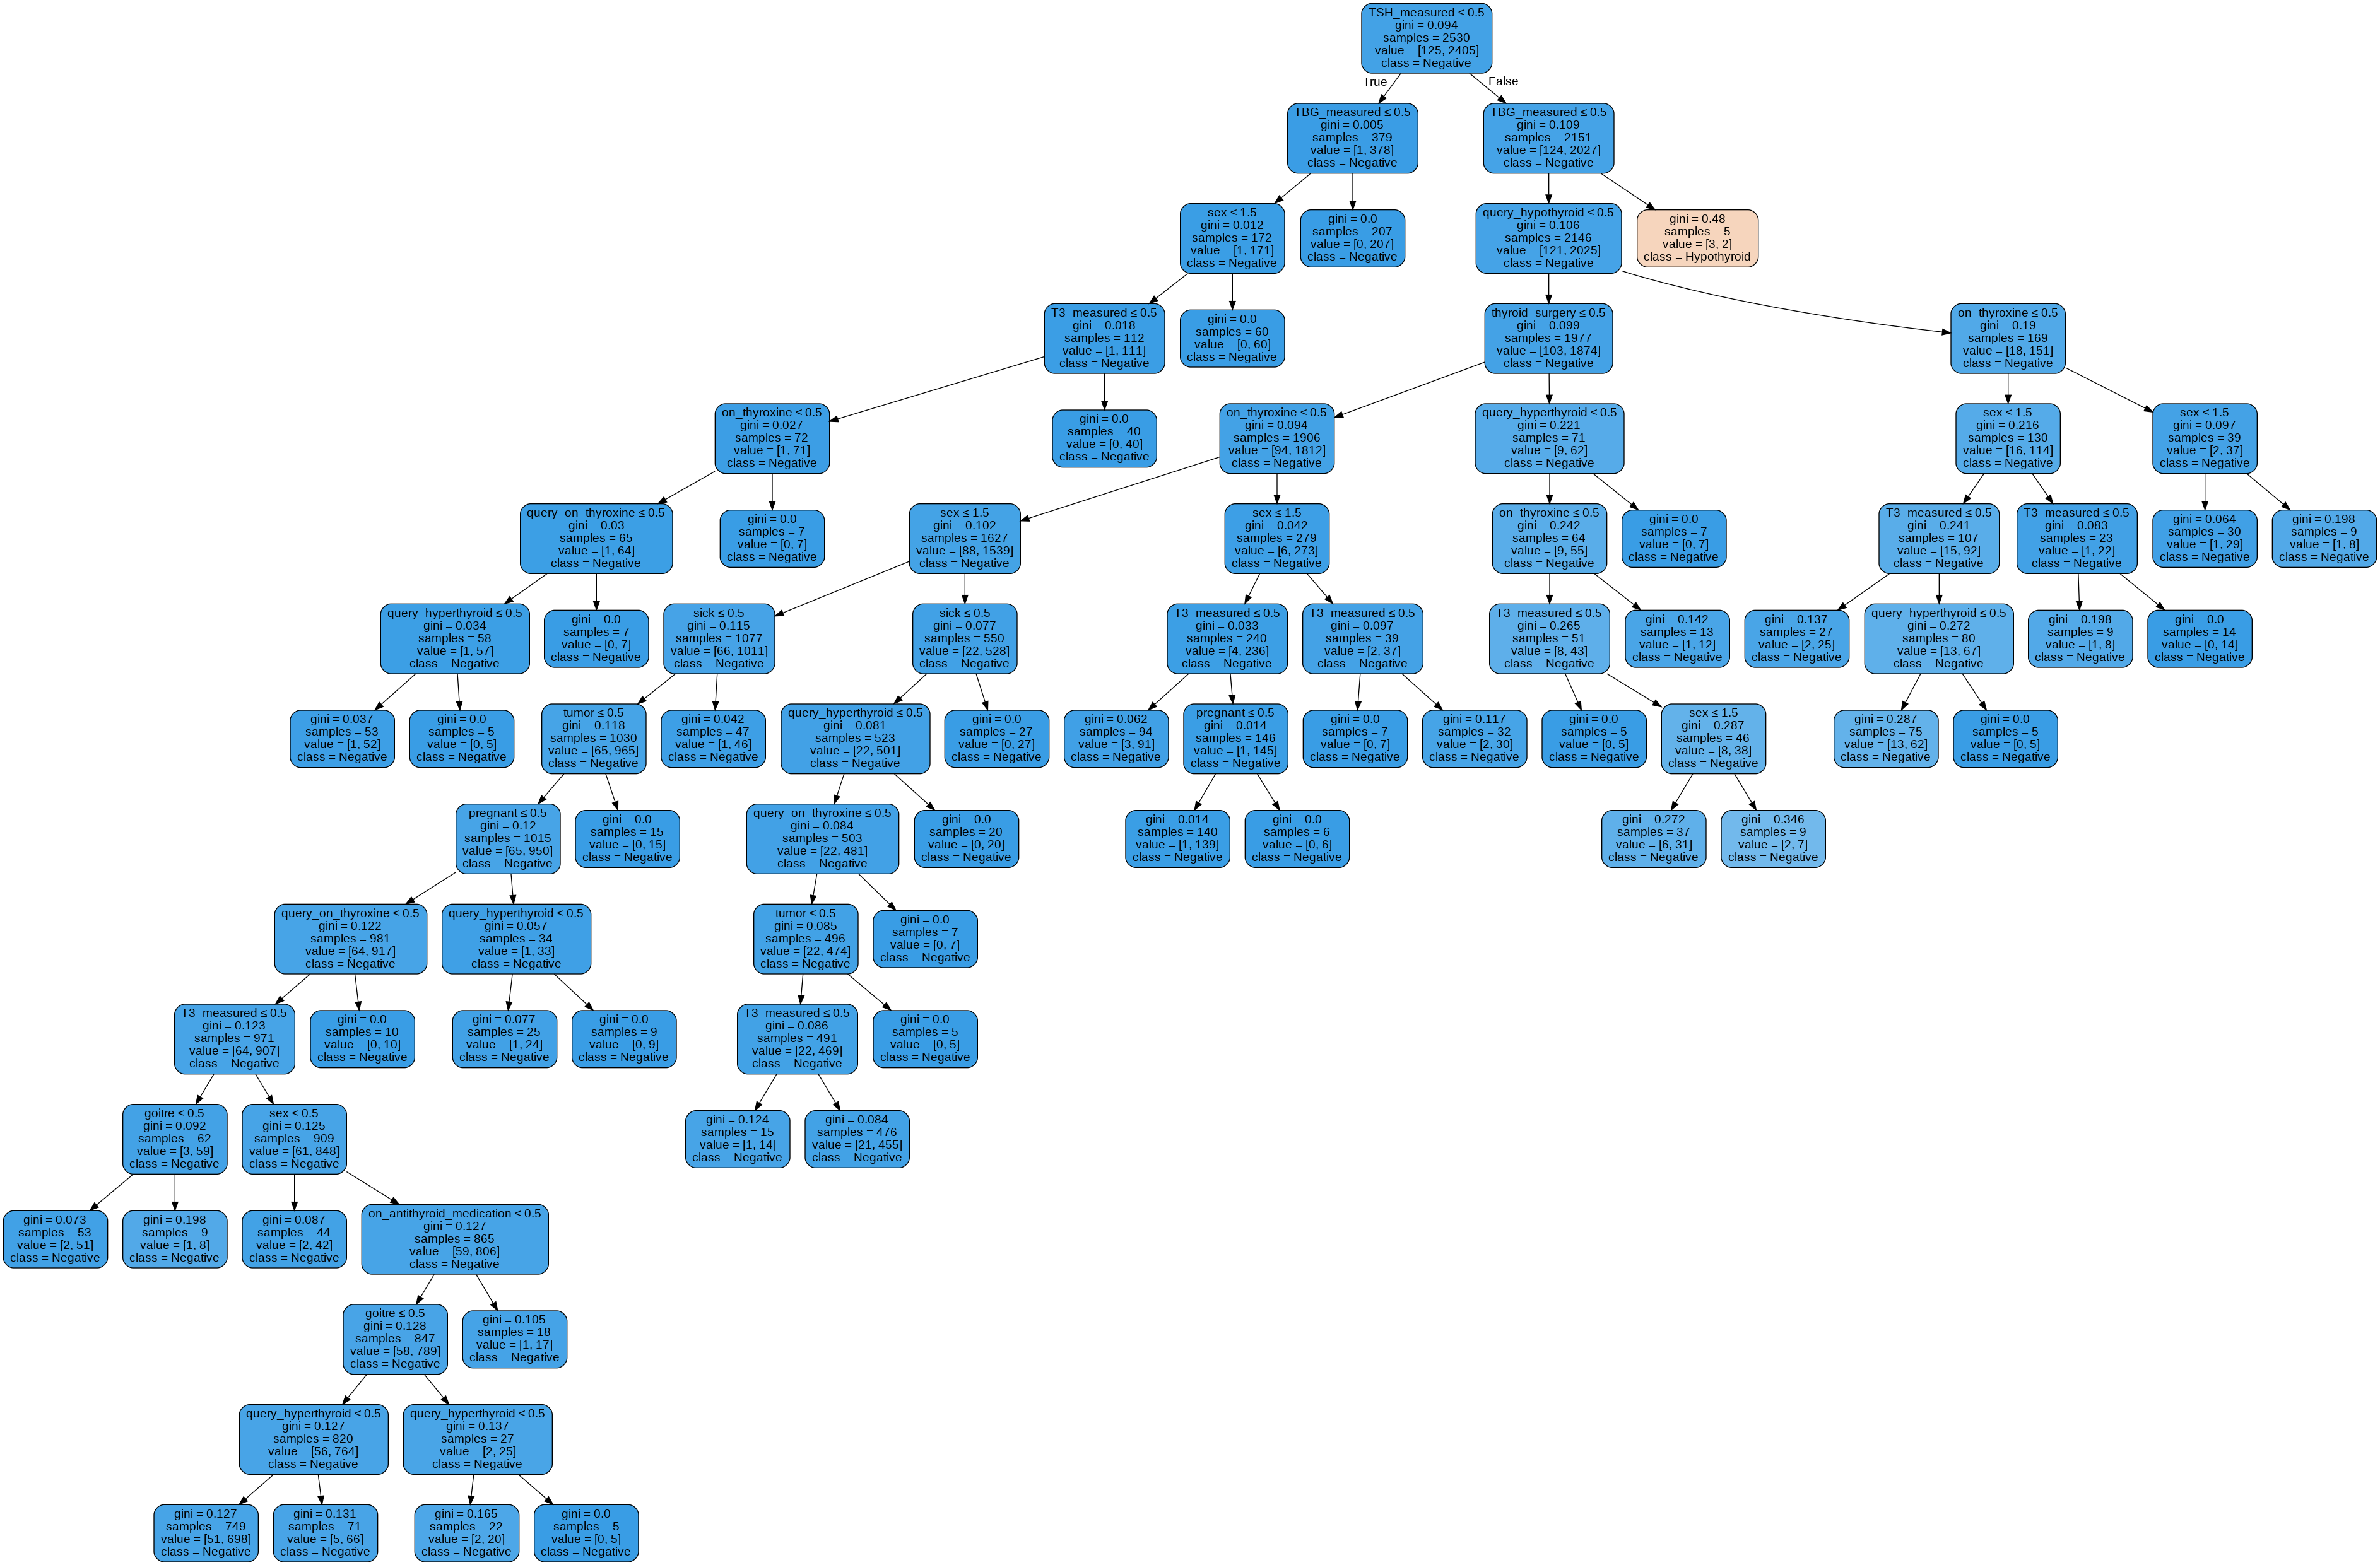

In [24]:
# plot the decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,feature_names = test_features,
                class_names=['Hypothyroid', 'Negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_status.png')
Image(graph.create_png())

In [25]:
# Check the sex details from the original dataframe
print(f"The sex deatils from the original dataframe are: {data_df['sex'].unique()}")

print(f"While the sex details from the encoded dataframe are: {encoding_df['sex'].unique()}")

print("Therefore, values of 0.5 from the decision tree on the sex variable "
"\nimplies that from a sample size of 2,530, it was evident that 1,789 females had hypothyroidism "
"\nwhile 741 did not have hypothyrodism as per the value =[1789,0] and with a root node class = hypothyroid "
"\nand value =[0,741] with a root node class of Negative")

The sex deatils from the original dataframe are: ['M' 'F' '0']
While the sex details from the encoded dataframe are: [2 1 0]
Therefore, values of 0.5 from the decision tree on the sex variable 
implies that from a sample size of 2,530, it was evident that 1,789 females had hypothyroidism 
while 741 did not have hypothyrodism as per the value =[1789,0] and with a root node class = hypothyroid 
and value =[0,741] with a root node class of Negative



Gini index < 0.2 represents perfect equality, 0.2–0.3 relative equality, 0.3–0.4 adequate equality, 0.4–0.5 big gap, and above 0.5 represents severe gap. Therefore, the warning level of Gini index is 0.4. Having a gini value of 0.0 from the decision tree on the sex variable shows that there was perfect equality.

However, despite including all the categorical variables, there's no information on the rest of the variables. This might imply that sex plays a major role in determining if a patient has hypothyroidism or not. We will not make that conclusion yet until we review the continous variables as well then determine the features with high values after doing the gradient boost regression and clasification analysis and thereafter make a comparison.

### Decision Trees regression Analysis

In [26]:
# Check the simple statistics for the continuous variables
data_df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,43.941195,5.046782,1.513531,100.281031,0.901502,106.386310,2.571483
std,25.235169,22.160083,1.191836,52.588757,0.341286,65.607474,10.204298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.500000,76.000000,0.820000,85.000000,0.000000
50%,48.000000,0.400000,1.600000,100.000000,0.940000,105.000000,0.000000
75%,64.000000,1.800000,2.200000,124.000000,1.050000,126.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [27]:
# Preview the columns
data_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [28]:
# Predict hit target of an employee, based on their attendance record
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# y label is the status variable from the encoded dataframe (encoding_df) to enable calculate RMSE
# but all the x lables are from the original dataframe (data_df)
y = encoding_df['status'].values

# select the test features
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

# X variables
X = data_df[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
# Create a decision tree regressor model

tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.954689
std,0.198617,0.208095
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


The prediction looks extremely close to the test data. Let's see what the metrics says.

In [30]:
# check the RMSE of our prediction model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.02107481559536354
Mean Squared Error: 0.02107481559536354
Root Mean Squared Error: 0.14517167628488534


The RMSE of

In [31]:
# Retrain the model by Creating a decision tree classifier with a maximum depth of 5 and min_samples_split of 30
tree = DecisionTreeRegressor(min_samples_split = 30, max_depth=5)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.954891
std,0.198617,0.195595
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [32]:
# Let's check the RMSE of the retrained prediction model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.019319006922793237
Mean Squared Error: 0.014461838468892731
Root Mean Squared Error: 0.12025738425931579


With no maximum depth and min_samples_leaf dfined, the RMSE was Root Mean Squared Error: 0.08588472191476922. After considering a maximum depth of 5 and min_samples_leaf of 30, the RMSE score didn't change much. It was Root Mean Squared Error: 0.08885318843999986. A difference of 0.0030. That is so insignificant. From the two models it means that the standard deviation residuals of our predicted model very low thus the data is highly concentrated near the line of best fit. We will therefore visualize the retrained model.

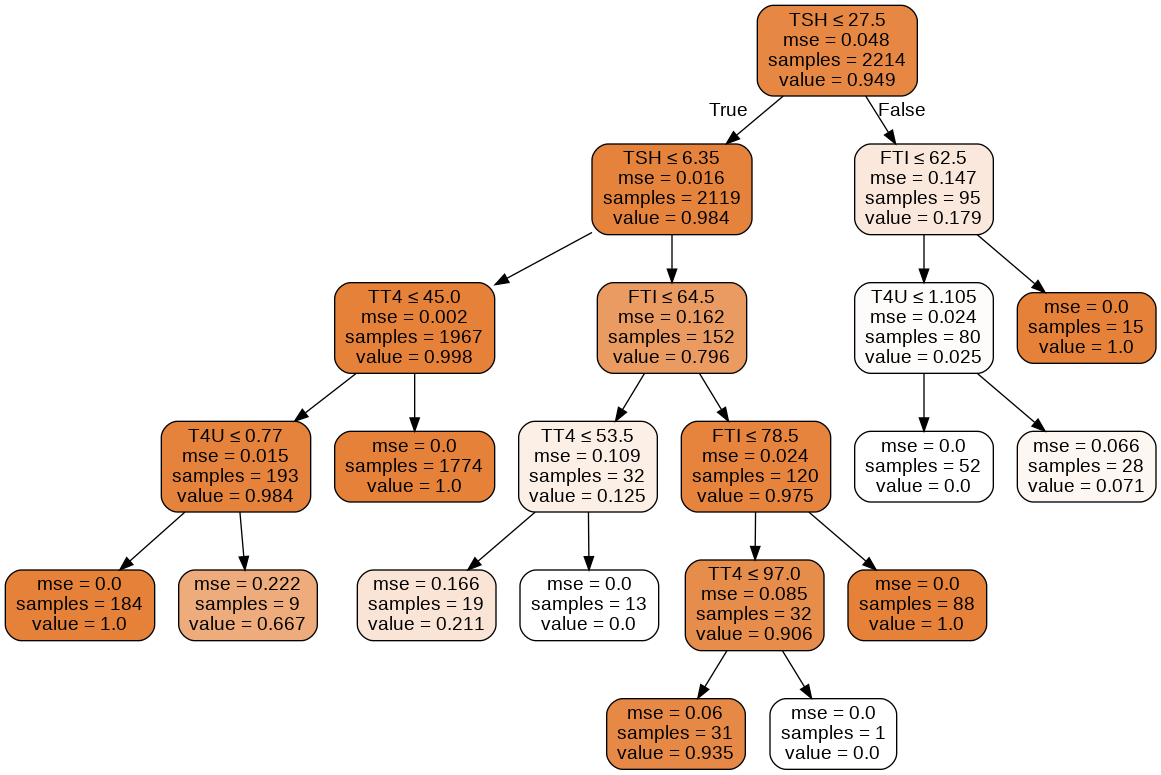

In [33]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_status.png')
Image(graph.create_png())

From the regresiion analysis, only a few variables have an impact on determining whether a patient has thyroid or not. These variables are:
1. FTI
2. TSH
3. TBG
4. Age







We will train the model again but this time include only those variables that were featured on both decision trees (classification and regression models). this time round we will add the sex variable.

In [34]:
# Predict hit target of an employee, based on their attendance record
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# y label is the status variable from the encoded dataframe (encoding_df) to enable calculate RMSE
# but all the x lables are from the original dataframe (data_df)
y = encoding_df['status'].values

# select the test features
test_features = ['sex','age', 'TSH', 'FTI', 'TBG']

# X variables
X = encoding_df[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
# Create a decision tree regressor model

tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=30)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.952124
std,0.198617,0.191454
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [36]:
# Let's check the RMSE of the retrained prediction model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.02155848070465575
Mean Squared Error: 0.01259014789796982
Root Mean Squared Error: 0.11220582827094955


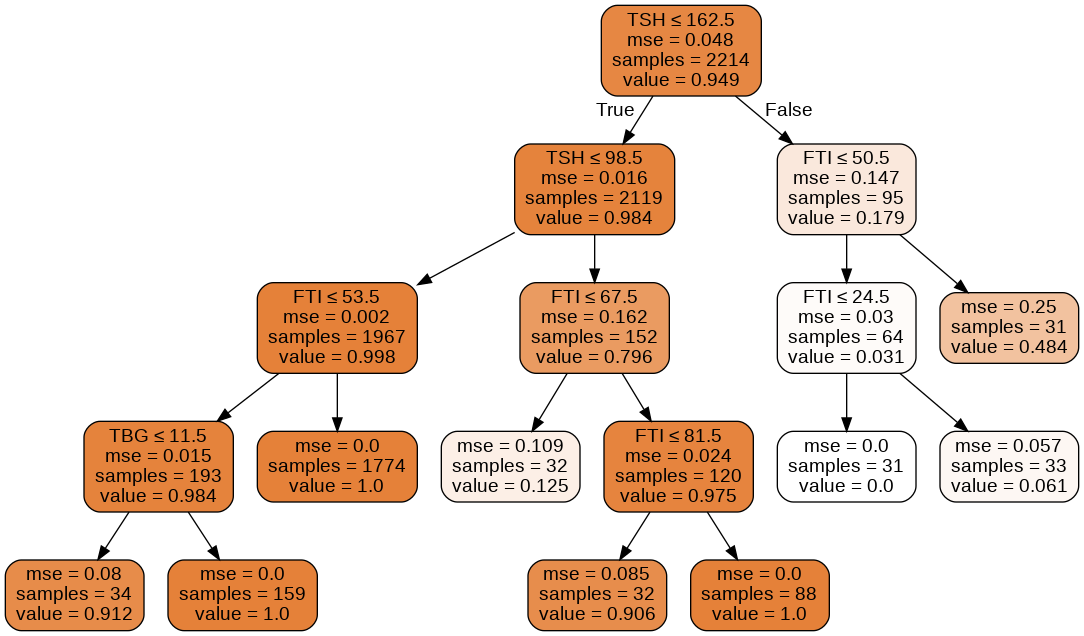

In [37]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_status.png')
Image(graph.create_png())

After considering the variables that could determine if a patient has thyroid from the classification and regression models which were age, sex, FTI, TSH and TBG, the above diagram indicates that only TSH, FTI and TBG are determinants of whether a patient has thyroid or not. 

We will not make a conclusion yet but perform the analysis once more with all the variables included then do feature importance

### Decision Tree Classifier including all independent variables

In [38]:
#importing required liraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Split the independent and dependent variables
# We want to predict the whether or not the patient's symptoms determine hypothyroidism 
y = encoding_df['status'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
X = encoding_df[test_features].values

# Splitting Dataset into 70% Train set and 30% Test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [39]:
from sklearn.tree import DecisionTreeClassifier
# Fitting the variables into the classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

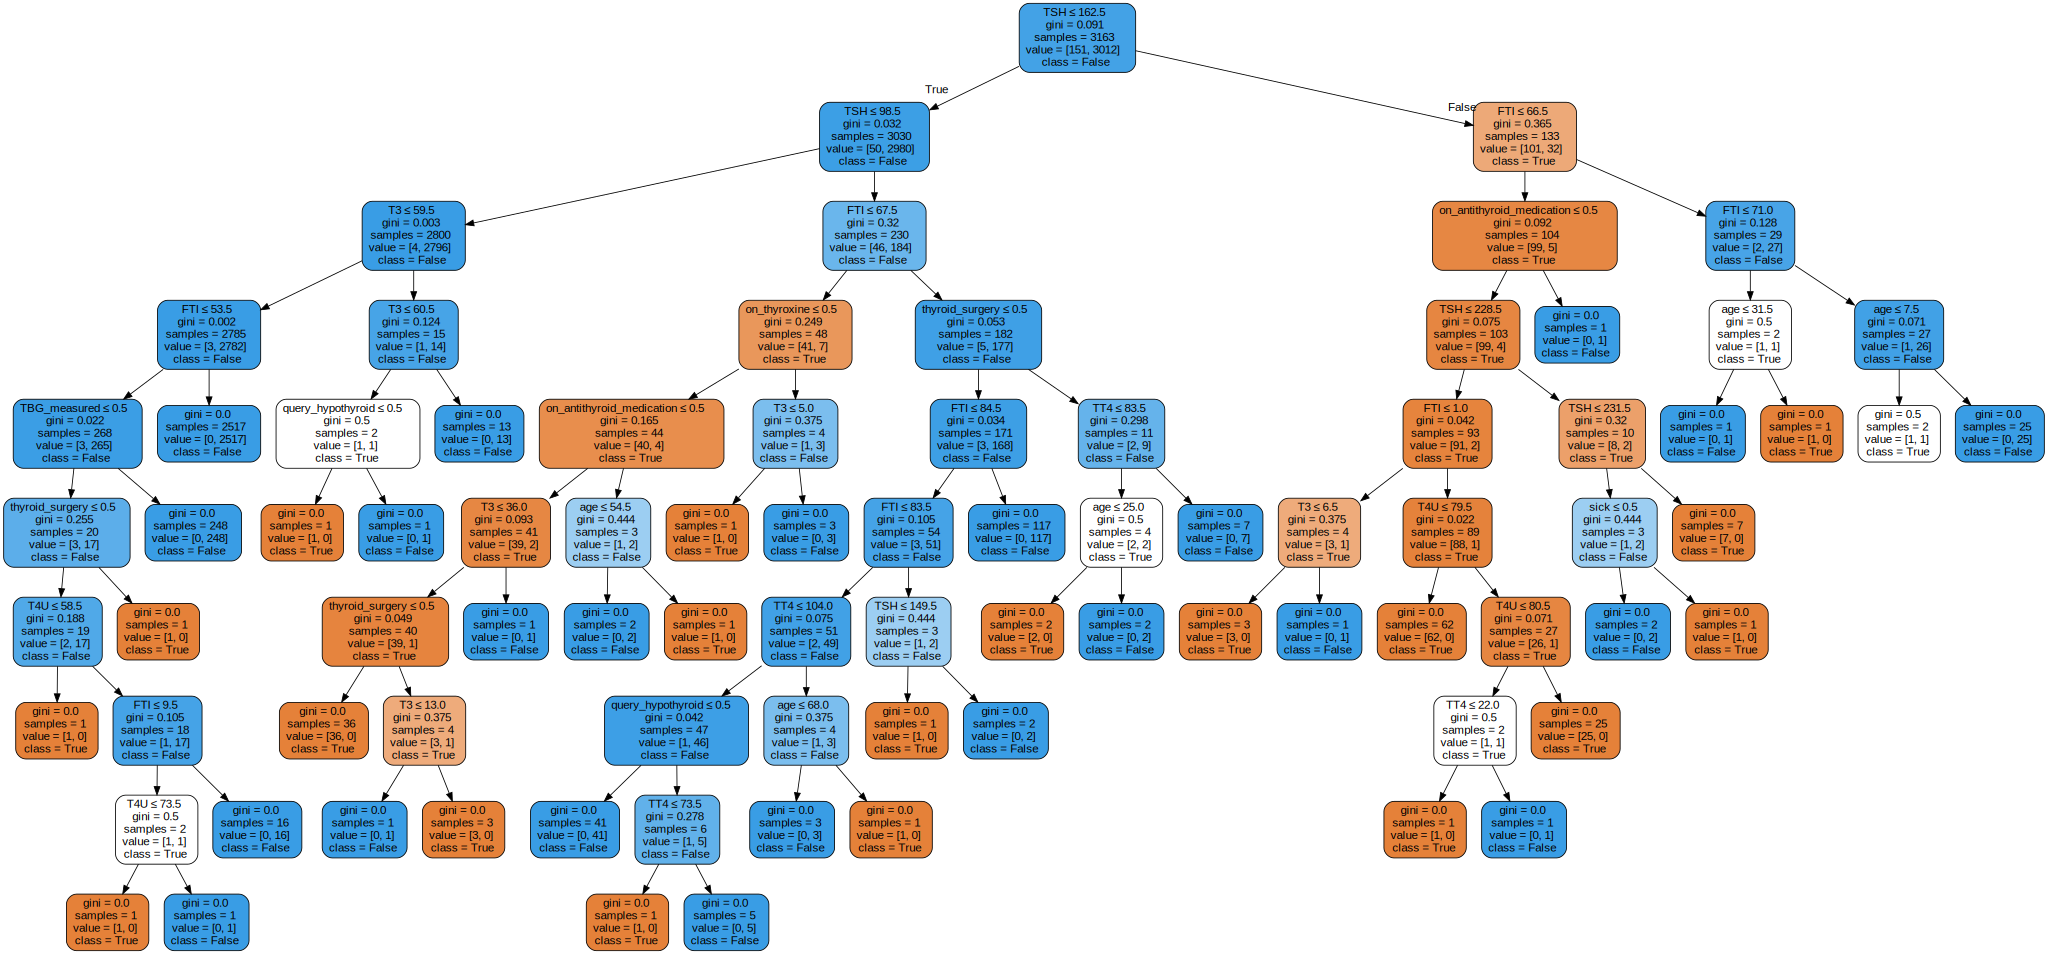

In [40]:
#visualizing the tree
import matplotlib.pyplot as plt
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names = test_features,
                class_names=['True', 'False'],
                filled=True, rounded=True,
                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [41]:
# Predict based on the model we've trained
y_pred = clf.predict(X_test)

# Create a decision tree classifier
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.952582
std,0.198617,0.212644
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [42]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01685985247629083
Mean Squared Error: 0.01685985247629083
Root Mean Squared Error: 0.1298454946322391


In [43]:
from sklearn import metrics
# Model Accuracy, checks how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9831401475237092


In [44]:
print('The accuracy of Random Forest')
random_forest = "Accuracy: {}%".format(int(round((metrics.accuracy_score(y_test, y_pred)) * 100)))
print(random_forest)

The accuracy of Random Forest
Accuracy: 98%


In [45]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.01), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.62), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.01), ('T4U_measured', 0.0), ('T4U', 0.01), ('FTI_measured', 0.0), ('FTI', 0.3), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.62
Variable: FTI                  Importance: 0.3
Variable: on_antithyroid_medication Importance: 0.02
Variable: age                  Importance: 0.01
Variable: on_thyroxine         Importance: 0.01
Variable: thyroid_surgery      Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: T4U                  Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Varia

We will not make a conclusion yet but perform AdaBoost and later gradient boost to see what results we will achieve. 

### Performing AdaBoost

In [46]:
# Check the column names 
encoding_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Choose the y variable
y = encoding_df['status'].values

# Determine the test features
test_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

# set the x variable
X = encoding_df[test_features].values

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a decision tree classifier, we will set its max_depth to 4
# What happens if you decrease this parameter? if you increase it? 
# What happens if you remove it altogether?
tree = DecisionTreeRegressor(max_depth=4)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

ValueError: ignored

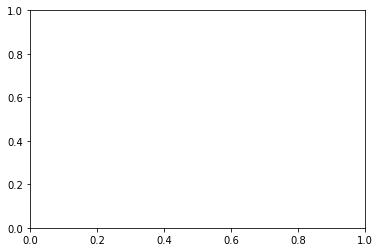

In [48]:
# Let's visualize the data
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

In [ ]:
# Check TBG column value count for '?' values
info = data_df['TBG'].value_counts()
print(info.head(5))

# Check the percentage of TBG with '?' values having a total of 3163 data points
# for TBG column and 2903 values of '?'
c = (2903/3163)*100

print(f"\nThe total number of TBG values with '?' is {c} of the entire dataset.\n"
"This is too much data to lose. Therefore, we will replace the ? with 0.")

In [ ]:
# Replace the '?' with 0 in the TBG column
data_df['TBG'] = data_df['TBG'].replace(['?'], 0)
t = data_df['TBG'].value_counts()

# Preview the changes
t.head(3)

In [ ]:
data_df['query_on_thyroxine'].unique() # f stands for false and t stand for true

In [ ]:
# Couldn't convert the data types to numeric because of '? at position 26
# Preview position 26
data_df.iloc[26]

In [ ]:
# check unique values for the age variable
data_df['age'].unique()

In [ ]:
# Check how many '?' are ther on the age column
age_unknown = data_df['age'].value_counts()
age_unknown.head(4)

In [ ]:
# Instead of replacing the'?' on the age column, we will drop them for they are few (446 in number)
# and doing analysis without knowing the age of patient might not be of any help
# when determining if age is a determinant on causes of thyroidism
df = data_df.copy(deep=True)
df = df.drop(df[df['age']=='?'].index)
t = df['age'].value_counts()

# confirm the 446 rows have been dropped
t.head(4)


In [ ]:
data_df.columns

In [ ]:
# Couldn't convert the data types to numeric because of '? at position 26
# Preview position 52
df.iloc[52]

In [ ]:
# Check total point with no TSH
df['TSH'].value_counts()

In [ ]:
# Drop the points with '?' as values on TSH
df = df.drop(df[df['TSH']=='?'].index)
t = df['TSH'].value_counts()

# confirm the '?' on TSH have been dropped
t.head(4)


In [ ]:
# Check for ? at position 8
df.iloc[8]

In [ ]:
df['T3'].value_counts()

In [ ]:
# Drop the points with '?' as values on T3
df = df.drop(df[df['T3']=='?'].index)
t = df['T3'].value_counts()

# confirm the '?' on T3 have been dropped
t.head(4)

In [ ]:
for i, col_values in data_df.items():
  if col_values.dtypes is object:
    print(f"The {i} variable has a categorical data type")
  else:
    print(f"The {i} variable has a continuous data type")

In [ ]:
for i in df.columns.to_list():
  variables = df[i].unique()
  if variables is object:
    print(f"The {i} variable has a categorical data type")
  else:
    print(f"The {i} variable has a continuous data type")

In [ ]:
# Getting the dshape of the new dataset
df.shape

In [ ]:
# Check the length of categorical features
len(categorical_features)

## 4. External Data Source Validation

### a.Validation
Performed a validation with the ....... [Website](...........). More information is found on this [link](............).

### 5.0 Decision Trees

## 6. Data Cleaning

### 6.1 Cleaning the Dataset

In [49]:
# Considering that we will use rank, country full and rank date columns, we will drop the rest 
# as they wont be used.
# The Rank column from the Rankings dataset will be used to merge onto the results dataset
#column_names = ['country_abrv', 'total_points',
       #'previous_points', 'rank_change', 'cur_year_avg',
       #'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       #'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       #'three_year_ago_weighted', 'confederation']

#ranking_df = ranking_data.drop(columns=column_names)
#ranking_df.head(2)

In [50]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        3163 non-null   int64  
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [ ]:
# Choosing a Sample size
data = data_df.sample(n=14700, replace="False")
data.shape

In [ ]:
# Drop unneccesary columns 
new_df = df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)
df.head(2)

In [ ]:
# drop all the duplicate values
df.drop_duplicates(subset ="id", keep = False, inplace = True)
df.shape

In [ ]:
# Plotting columns with numerical values only to check for outliers
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
             'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
             'sqft_lot15', 'year_built', 'year_renovated']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

# The outliers on the year renovated column is because most years are captured as
# zero so we will create a new column to show those renovated as 1 and those not renovated as 0


In [ ]:
# checking the anomalies
Quantile_1 = df.quantile(.25)
Quantile_3 = df.quantile(.75)
IQR_values = Quantile_3 - Quantile_1

anomalies = ((df < Quantile_1 - 1.5* IQR_values) | (df > Quantile_3 + 1.5 * IQR_values)).sum()
anomalies

Initially we had seen that the year renovated column had 914 entries with years indicated while almost 20,000 entries didn't have any year of renovation indicated. Having 906 entries on year renovated as an anomaly is because majority of the data in that column had zero as year of renovation. We will therefore not drop these anomalies as they are not anomalies per se.

In [ ]:
# Checking the data distribution type by performing a normality test using the Shapiro Test
# importing the shapiro function
from scipy.stats import shapiro

data = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
             'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
             'sqft_lot15', 'year_built', 'year_renovated']]

# Test for normality
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the results
alpha = 0.05
if p > alpha: 
  print('Sample looks Guassian.')
else:
  print('Sample does not look Guassian.')


## 6. Exploratory Analysis

In [ ]:
# Change the bathroom and floors datatype from float to integer 
# Because the number of bathrooms and floors need to be whole numbers
# But first, round off the float values
# Then convert float to integer
df['bathrooms'] = df['bathrooms'].round(0)
df['floors'] = df['floors'].round(0)

In [ ]:
# Convert float values of bathrooms and floors to integer
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [ ]:
# check the unique values in columns
df.columns

In [ ]:
# check the unique values on the view column
# The most viewed houses had 4 views and there are those houses that didn't have a view
df['view'].unique()

In [ ]:
# Houses with waterfront had the value 1 and those with no water front had
# the value 0
df['waterfront'].unique()

In [ ]:
# There were houses with most number of bathrooms: 7
df['bathrooms'].unique()

In [ ]:
# The number of floors ranged from 1, 2 to 3
df['floors'].unique()

In [ ]:
# There was a house with 33 number of bedrooms. But because of the selection of sample size,
# it is not part of the sample.
# Therfore remaining with houses with the highest number of bedrooms as 11
df['bedrooms'].unique()

In [ ]:
# Previewing the outliers on the bedrooms column to see if the houses with 11 and 8 number
# number of bedrooms is viable
gkk = df.groupby(['bedrooms'])
gkk.last()
# From previewing the bedromms column, it's confirmed that that particular house


### 6.1 Univariate Analysis

In [52]:
# Ploting the univariate summaries
df_1 = df.copy(deep=True)
col = ['id', 'waterfront', 'zipcode', 'lat', 'long', 'sqft_living15',
       'year_built', 'year_renovated']

df_drop = df_1.drop(columns=col, inplace=True)
df_1.columns
df_1.describe()

NameError: ignored

In [53]:
# Sort Values By Views
most_viewed= df.sort_values(by = 'view', ascending = False)
most_viewed.head(5)

NameError: ignored

In [ ]:
# Plot histogram to show the value count per parameters
most_viewed.drop(columns=['id', 'zipcode', 'sqft_living15', 'sqft_lot15'], inplace=True)

most_viewed.hist(figsize = (15, 15));


In [ ]:
# Check the Skewness
for i, col_val in enumerate(df_1.columns):
  print(f"The skewness of {col_val} is: {df_1[col_val].skew()}")

In [ ]:
# Check the Kurtosis
for i, col_val in enumerate(df_1.columns):
  print(f"The kurtosis of {col_val} is: {df_1[col_val].kurt()}")

### 6.2 Bivariate Analysis

In [ ]:
# plot scatter matrix to display Bivariate Relationships between combination variables
y = df_1['grade']
_ = pd.plotting.scatter_matrix(df_1, c = y, figsize=[15,20], s=150, marker='D')

In [ ]:
y = df_1['price']
_ = pd.plotting.scatter_matrix(df_1, c = y, figsize=[15,20], s=150, marker='D')

In [ ]:
# Scatter plot for price vs number of bedrooms
x = df_1['bedrooms']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.title('Relationship between Price and No. of Bedrooms');

In [ ]:
# Scatter plot of price and the living area square feet.
x = df_1['sqft_living']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title('Relationship between Price and the Living Area Sqft');

There's a positive relationship between the price and the living area sqft. As the sqft increases, the price also increases.

In [ ]:
# Scatter plot of sqft-above and price
x = df_1['sqft_above']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel('sqft_above')
plt.ylabel("price")
plt.title("Relationship between Price and sqft-above");

There's a relationship between price and sqft above

In [ ]:
x = df_1['sqft_lot15']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel('sqft_lot15')
plt.ylabel("price")
plt.title("Relationship between price and sqft_living15");

In [ ]:
# Convert the date index to time series
# For time series, set the date column to be the index column
# Save the changes in a new dataframe
time_series_df = data.copy(deep=True)
time_series_df.head(2)

In [ ]:
# Line graph of how the price has fluctuated over time from the year the houses were
# built for the past 10 years (2005 to 2015)
yr_built = time_series_df[time_series_df["year_built"] >= 2005]
scatter =yr_built.groupby("year_built")['price'].mean().reset_index(name = 'avg_per_year')

x = scatter['year_built']
y= scatter['avg_per_year']
plt.figure(figsize=(20,5))
plt.plot(x,y,color = 'green',marker = 'o',linestyle = '-')
plt.xlabel('Year Built')
plt.xticks(x)
plt.ylabel('Price')
plt.title('Line graph of year_built to Price', fontsize = 20,fontweight='bold');

In [ ]:
# Line graph of how the price has fluctuated over time from the year the houses were
# renovated for the past 10 years (2005 to 2015)
yr_renovated = data[data["year_renovated"] >= 2005]
scatter =yr_renovated.groupby("year_renovated")['price'].mean().reset_index(name = 'avg_year_renovated')

x = scatter['year_renovated']
y= scatter['avg_year_renovated']
plt.figure(figsize=(20,5))
plt.plot(x,y,color = 'green',marker = 'o',linestyle = '-')
plt.xlabel('yr_built')
plt.xticks(x)
plt.ylabel('Price')
plt.title('Line graph of year_renovated to Price', fontsize = 20,fontweight='bold');

In [ ]:
# make a copy of the dataset and create a new column for renovations
renov_df = data.copy(deep=True)

In [ ]:
#Since the year renovated had most 0 values, we will change the the zeros to reflect
# not renovated and 1 to reflect those houses that were renovated.
renov_df.loc[df['year_renovated']==0,'renovations']=0
renov_df.loc[df['year_renovated']>0,'renovations']=1
renov_df.head(2)

In [ ]:
# Convert float values of renovations to integer
renov_df['renovations'] = renov_df['renovations'].astype(int)
renov_df.head(1)

In [ ]:
# Relationship between price and renovated houses or not
x = renov_df['renovations']
y = renov_df["price"]
plt.scatter(x, y)
plt.xlabel('Renovation Status')
plt.ylabel("Price")
plt.title("Relationship between Price and Renovation Status");

In [ ]:
# Create a new column for current date (27th July 2021)
renov_df['date'] = pd.to_datetime('today')
renov_df.head(1)


In [ ]:
# Extract the year from current date
renov_df['current_year'] = renov_df['date'].dt.year
renov_df.head(2)

In [ ]:
# Establish the age of the house by subtracting the year built from current year
renov_df['house_age'] = renov_df['current_year'] - renov_df['year_built']
renov_df.head(1)

In [ ]:
# relationship between price and age of the house
x = renov_df['house_age']
y = renov_df["price"]
plt.scatter(x, y)
plt.xlabel('Age of the House')
plt.ylabel("Price")
plt.title("Relationship between Price and the Age of the House");

#### 6.3 Performing Discriminant Analysis

In [ ]:
# Preview the columns
renov_df.columns

In [ ]:
# Drop the date and current year column
renov_lda_df = renov_df.copy(deep=True)
renov_lda_df.head(1)
renov_lda_df.drop(columns=['date', 'current_year'], inplace=True)
renov_lda_df.head(1)

In [ ]:
# Preview the columns
renov_lda_df.columns

In [ ]:
# Create features and labels
X = renov_lda_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                  'sqft_basement', 'renovations', 'house_age']].values
y = renov_lda_df['price'].values

In [ ]:
# Divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

From the finding above, the values with regressor coefficient of negative shows that those independent variables have little or no impact on the price of the house. We will therefore drop them. These are: bedrooms, zipcode, longitude, sqft-lot15, year-built and renovations. We will therefore drop them and perform an accuracy of our prediction model.

The variables/factors that affect housing pricing from the linear discriminant analysis in descending order are :
1.   The Grade of the house
2.   The Year Renovated
3.   sqft above
4.   Water Front
5.   Sqft base





In [ ]:
# Drop the independent variables that have no impact on the house prices
# These are bedrooms, zipcode, longitude, sqft-lot15, year-built and renovations
variables_df = renov_lda_df.copy(deep=True)
variables_df.head(1)
variables_df.drop(columns=['bedrooms', 'zipcode', 'long','sqft_lot', 'sqft_lot15', 'year_built', 'lat',	'sqft_living15',	'year_renovated'], inplace=True)
variables_df.head(1)


In [ ]:
variables_df.columns

In [ ]:
# Create features and labels
X = variables_df[['bathrooms', 'sqft_living', 'floors', 'waterfront',
                  'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'renovations', 'house_age']].values
y = variables_df['price'].values

In [ ]:
# Divide data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

In [ ]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

comparison_frame

In [ ]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

In [ ]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

Despite the fact that the variables with no or limited effect on the house prices had been dropped, the the accuracy of the prediction model was 10.93%. This is a very low percentage for a predicting model. We will therefore perform feature engineering and see what model accuracy will be obtained.

### 6.4 Performing Feature Engineering

In [ ]:
# Preview the dataframe
renov_lda_df.columns

In [ ]:
# we had already created a column for house age and renovations
# The renovations column was to have 1 represent houses that have been renovated 
# and 0 to represent houses that haven't been renovated
# We will create a new column for house space. This column will include sqft-living,
# sqft-basement and sqft-above
eng_df = renov_lda_df.copy(deep=True)
eng_df['house_space'] = eng_df['sqft_living'] + eng_df['sqft_basement'] + eng_df['sqft_above']

# Drop unnecessary columns
eng_df.drop(columns=['sqft_living', 'sqft_basement', 'sqft_above'], inplace=True)
eng_df.head(1)


## 7. Implementing the Solution-Multiple Linear Regression

### 7.1 Polynomial Regression

> We'll first check the multicollinearity between the variables and drop those variables that seem to be correlated.





#### 7.1.1 Multicollinearity

#### Finding correlation between the independent variables

In [ ]:
# Make a copy of the dataframe
df_2 = eng_df.copy(deep=True)
df_2.head(2)

In [ ]:
df_2.columns

In [ ]:
# Set price as the dependent variable
# Compute the correlation then use the correlation to compute the VIF score for each variable
# We'll drop the price column
prediction_df = df_2.drop(columns=['price'], inplace=True)
prediction_df = df_2.corr()
prediction_df 

The tabe above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Using these correlations to compute the VIF score for each variable. But first we'll create a new dataframe with the inverse of the matrix above.

#### 7.1.2 Calculating the VIF Score for each independent variable

In [ ]:
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df.values), index = prediction_df.index, columns=prediction_df.columns)

The VIF score for each variable is below 5. A rule of thumb is if a VIF is > 10, there's high multicollinearity among the variables. In this case, with values around 1, we are in good shape, and can proceed with the regression. The VIF for house age is -5.629500e+14, that of renovations is 17206.700606 and that of year renovated is 17206.344344. This indicates that all the three variables are correlated. having the renovations and year renovated being positively correlated while the two have a negative correlation with the house age. Meaning that as the house ages, more renovations are done. Therefore, we will drop the year renovated variable and see what impact it has on the house age and renovations variables.

In [ ]:
# Check the columns
df_2.columns

In [ ]:
# Compute Correlation after dropping the year renovated variable
prediction_df2 = df_2.drop(columns=['year_renovated'], inplace=True)
prediction_df2 = df_2.corr()
prediction_df2 

In [ ]:
# Calculate the VIF scores
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df2.values), index = prediction_df2.index, columns=prediction_df2.columns)

After dropping the year renovated variable, the VIF score for renovations has improved drastically from 17206.70 to 1.16. A VIF score of 1.16 is good for further analysis as it indicates that the renovations variable has no correlation with any other independent variables. However, the VIF score for year built and house age are the same with a negative value of -5.629500e+14.

If the independent variables in a regression model show a perfectly predictable linear relationship, it is a perfect multicollinearity.

With multicollinearity, the regression coefficients are still consistent but are no longer reliable since the standard errors are inflated. It means that the model’s predictive power is not reduced, but the coefficients may not be statistically significant with a Type II error. It is in this view that I will drop the house age variable and check the VIF of the remaining variables again.

In [ ]:
# The house age seem to have a correlation with year built variable beacause
# they have the same VIF score so I will drop the year built variable
# Compute Correlation after dropping the correlated independent variables
prediction_df3 = df_2.drop(columns=['year_built'], inplace=True)
prediction_df3 = df_2.corr()
prediction_df3 

In [ ]:
# Calculate the VIF scores
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df3.values), index = prediction_df3.index, columns=prediction_df3.columns)

After dropping the correlated variables, the VIF score of each independent variable is now at one. This shows that there's no multicorrelinearity between independent variables. We can now proceed with regression; model creation and displaying a residual plot for it.

#### 7.1.3 Building model

In [ ]:
prediction_df3.columns

In [ ]:
## Preview the columns
df_2.columns

In [ ]:
df.columns

In [ ]:
# Import the polynomial features and the linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X = df_2.values
y = renov_lda_df['price'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

# Fit polynomial Regression to the dataset with a degree of 2
polynomial_regression = PolynomialFeatures(degree = 2) 
X_polynomial = polynomial_regression.fit_transform(X)

pol_regression = LinearRegression()
pol_regression.fit(X_polynomial, y)

y_pred = pol_regression.predict(polynomial_regression.fit_transform(X_test))

In [ ]:
# Fit polynomial Regression to the dataset with a degree of 3
polynomial_regression_3 = PolynomialFeatures(degree = 3) 
X_polynomial_3 = polynomial_regression_3.fit_transform(X)

pol_regression_3 = LinearRegression()
pol_regression_3.fit(X_polynomial_3, y)

y_pred_3 = pol_regression_3.predict(polynomial_regression_3.fit_transform(X_test))

In [ ]:
# Fit polynomial Regression to the dataset with a degree of 4
polynomial_regression_4 = PolynomialFeatures(degree = 4) 
X_polynomial_4 = polynomial_regression_4.fit_transform(X)

pol_regression_4 = LinearRegression()
pol_regression_4.fit(X_polynomial_4, y)

y_pred_4 = pol_regression_4.predict(polynomial_regression_4.fit_transform(X_test))

In [ ]:
# Fit polynomial Regression to the dataset with a degree of 5
#polynomial_regression_5 = PolynomialFeatures(degree = 5) 
#X_polynomial_5 = polynomial_regression_5.fit_transform(X)

#pol_regression_5 = LinearRegression()
#pol_regression_5.fit(X_polynomial_5, y)

#y_pred_5 = pol_regression_5.predict(polynomial_regression_5.fit_transform(X_test))

In [ ]:
# Calculating the Root Mean Squared Error
print(f"The Root Mean Squared Error for the 2nd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"The Root Mean Squared Error for the 3rd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_3))}")
print(f"The Root Mean Squared Error for the 4th  degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_4))}")
#print(f"The Root Mean Squared Error for the 5th degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_5))}")

The model with the fourth degree of freedom seem to be the preffered amongs't the three models because it has the lowest mean of 115,427.29 although this value is so high for a root mean squared error.

#### 7.1.4 Cross Validating the model

In [ ]:
# import the Kfold
from sklearn.model_selection import KFold

# We will use the K-Fold cross validation with a value of k=10
folds = KFold(n_splits=10)
print(f"The number of folds used is: {folds.get_n_splits(X)}")

# Assign RMSE to an empty list 
# then we will append the computed RMSES values of the 10 folds to the empty RMSES list
# and thereafter compute the avarage RMSES
RMSES = [] 

# Training Model 1
count = 1
for train_index, test_index in folds.split(X):
  print(f"\nTraining model {count}")
  
  # Set up the train and test 
  # With 10 folds, results in a model skill estimate with a low bias modest variance.
  X1_train, X1_test = X[train_index], X[test_index]
  y1_train, y1_test = y[train_index], y[test_index]
  
  # Fitting the model 
  regressor = LinearRegression()  
  regressor.fit(X1_train, y1_train)
  
  # Assess the accuraccy of the model
  y1_pred = regressor.predict(X1_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
  RMSES.append(rmse_value)
  
  print(f"Model {count} Root Mean Squared Error is: {rmse_value}")
  count = count + 1

From the 10 folds, the model with the least root mean squared error is the first training model with a value of 154502.43 which seems the preferred model.

In [ ]:
# Model evaluation

base_model = metrics.mean_squared_error(y_test, y_pred)
 
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))  
print('\nRoot Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nThe R2 score is          : ', r2_score(y_test, y_pred))

After performing model evaluation, it is evident that the model with the Root Mean Squared Error is the best for it has a prediction percentage of 84.38%. It's RMSe value is also below the average of the RMSES of the 10 folds.

In [ ]:
# RMSES Average
print(f"The Average Value of the RMSES of the 10 folds is: {np.mean(RMSES)}")

#### 7.1.5 Residual plots and heteroskedasticity testing

In [ ]:
# Residuals
residuals = np.subtract(y_pred_4, y_test)
pd.DataFrame(residuals).describe()

In [ ]:
# Residual plot for the Model 
plt.scatter(y_pred_4, residuals, color='blue')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Most of the residuals value are concentrated near the line of best fit. Which is good for the model.

In [ ]:
# Residual mean
residuals.mean()

##### Computing the Critical Value 

In [ ]:
# Use bartlett's test. 
# The test establishes as a null hypothesis that the variance is equal for all datapoints
# and the Ha hypothesis that the variance is different for at least one pair of datapoints
import scipy.stats as stats
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_4, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_4)-1
print(f"The degree of freedom is: {degree_of_freedom}")

# Probability
probability = 1 - p_value
print(f"The probability value is: {probability}")

# Critical Value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(f"The critical value is: {critical_value}")

if (test_result > critical_value):
  print("The variances are unequal! Reasses the Model!")
else:
  print("The variances are homogeneous! The model is good for consideration")

Having homogeneous variances is a sufficient confirmation that we can be comfortable with the results for predicting variables for sales prices. 

In [ ]:
#Distribution of error terms
residuals_plot = sns.distplot(residuals,kde=True)
residuals_plot = plt.title('Normality of the residuals');

### 7.2 Logistic regression model

In [ ]:
df_2.columns

In [ ]:
# Previewing the dataset
logistic_df = df_2.copy(deep=True)
logistic_df.head(2)

In [ ]:
# create feature and labels for the data
X=logistic_df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
               'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
               'sqft_lot15', 'renovations', 'house_age', 'house_space']]
y=df['price']

In [ ]:
# Fit the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [ ]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Fit the model
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

## 8. Challenging the solution

### 8.1 Quantile Regression

When to use quantile Regression:
1. To estimate the median, or the 0.25 quantile, or any quantile 
2. Key assumption of linear regression is not satisfied
3. When they are Outliers in the data
4. residuals are not normal 
5. Increase in error variance with increase in outcome variable

In [ ]:
data.columns

In [ ]:
# Declaring our X and y variables
# from all other regression models, we can see that grade has a high detrminant capacity
df_copy = df_1.copy(deep=True)

X = df_copy.drop(['price'], axis=1)
y = df_copy.price

#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
X_lda = lda.fit_transform(X,y)


# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=0,test_size=0.2)


# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ view + condition + grade + sqft_above + sqft_basement + year_built + year_renovated + sqft_living15 + sqft_lot15', data)
res = mod.fit(q=.5)

# Print the summary of the model
#
print(res.summary())
# The intercept is 9.09e+05 
# These are the parameters for the 0.5th quantile for y.

In [ ]:
# plotting Models for other Quantiles
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['grade'], res.params['condition'], res.params['view']] 
               + [res.conf_int().loc['grade'].tolist(), res.conf_int().loc['condition'].tolist(), res.conf_int().loc['view'].tolist()])

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'grade_coef', 'condition_coef', 'view_coef', 'condition_bound', 'grade_bound', 'view_bound'])
params

In [ ]:
# Plot the changes in the quantile coeffiecients
params.plot(x = 'qt', y = ['grade_coef', 'condition_coef', 'view_coef', 'condition_bound', 'grade_bound'],
            title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()


### 8.2 Ridge Regression

In [ ]:
#Defining the dependent and indepedent variables
X = df_copy.iloc[:,2:-1]
y = df_copy.iloc[:, 1]

#Apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
X_lda = lda.fit_transform(X,y)


# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=0,test_size=0.2)

# Import Ridge and GridSerachcv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#Grid Search
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-2,100,100)},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

#Fit the model to the data
search.fit(X_train,y_train,)

#The best alpha forour model given the range we set in the grid search
search.best_params_

#The best Mean squared error we can expect to get from the ridge model
ridge_mse = abs(search.best_score_)
print(ridge_mse)

#Compare the results of the ridge regression to the linear regression
if base_model > ridge_mse:
  print('\nThe ridge model produced a lower mean squared error.')
  print('Therefore this model is better compaired to the linear model.')
else:
  print('\nThe ridge model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the ridge model.')

In [ ]:
#The Test Model
# Fit the model with the best parameters from the grid search
# Calculate the mean squared error.

ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
test_model = (mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))
print(test_model)

#Compare the results of the ridge regression to the linear regression
if base_model > ridge_mse:
  print('\nThe ridge model produced a lower mean squared error.')
  print('Therefore this model is better compaired to the linear model.')
else:
  print('\nThe ridge model produced a higher mean squared error.')
  print('Therefore the linear model is the better model compaired to the ridge model.')

#checking the model accuracy using R2 score
k = (r2_score(y_test, y_pred))*100
print('\nThe R2 score for the ridge model :', r2_score(y_test, y_pred))
print('The model is ', k ,'% accurate')

In [ ]:
# Determine the coefficients of these models by using for loop to go through 
# the model and the zip function to combine the two columns.
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,X.columns):
    coef_dict_baseline[feat]= coef

coef_dict_baseline

In [ ]:
#Checking the Ridge coefficients
print('Ridge coefficients')
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat]= coef
coef_dict_baseline

#### 8.3 Lasso Regression

The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

In [ ]:
# Check the column names
data.columns

In [ ]:
#Choosing our mtrix of features x and the dv
x = data[['bedrooms', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'year_renovated', 'zipcode', 'lat', 'long','sqft_living','sqft_lot', "floors"]]
y = data["price"]

In [ ]:
#splitting the data into the training test and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#Standadising my datasetset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(x_train, y_train)

In [ ]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(x_train, y_train) 
y_pred = gridlasso.predict(x_test)

In [ ]:
# getting rmse and r2 score
r2 = r2_score(y_test,y_pred)
print("The RMSE for the lasso model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the lasso model is:",r2)

In [ ]:
#checking the model accuracy using R2 score
accuracy1 = (r2_score(y_test, y_pred))*100
print(f"The model is {accuracy1} % accurate")

#### 8.4 Elastic Net Regression

In [ ]:
#Choosing our mtrix of features x and the dv
x = data[['bedrooms', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'year_renovated', 'zipcode', 'lat', 'long','sqft_living','sqft_lot', "floors"]]
y = data["price"]

In [ ]:
#splitting the data into the training test and test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Normalizing the data and creating our grid.
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
#fitting the model into the elastic regression
search.fit(x_train, y_train)
search.best_params_

In [ ]:
#fitting the model 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(x_train,y_train)

# Making the predictions
y_pred = elastic.predict(x_test)
r2 = r2_score(y_test, y_pred)

#getting the rmse and the r2
print("The RMSE for the Elastic model:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The R2 score for the Elastic model is:",r2)

In [ ]:
#checking the model accuracy using R2 score
accuracy = (r2_score(y_test, y_pred))*100
print(f"The model is {accuracy} % accurate")

### 9.0 Conclusion


R-squared shows how well the regression model fits the observed data. The Elastic Model had an r-squared of 0.6784739458689396 which is 67.84% accurate,  Lasso Regression had an r-squared of 0.6791023123152032 that is 67.91% accurate , Ridge with an r2 of 0.397254746600497 with an accuracy of 39.72 and quantile regression with an r2 of 0.3805 which is 38.05% accurate. Amongst the four regression models, elastic model revealed a better fit for the model having the highest R2 score of 0.6784739458689396 thus being 67.84%.

#### 9.1 Did we have the right data:
Somehow yes we did have the right data. The only challenge was that the data would have captured the original price and the current valuation price for proper price predictions.

#### 9.2 Challenging the Solution
We may need to use other types of models such us Random Forest etc in-oder to increase the accuracy of the data.